# Generator Scores

In [1]:
from tqdm import tqdm
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from tqdm import tqdm
from keras.preprocessing import image
import os
from os import listdir
from os.path import join, isfile
import numpy as np
from matplotlib import pyplot
from keras.models import load_model
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import load_img
from numpy import expand_dims
#from skimage.transform import resize
from scipy.linalg import sqrtm
from skimage.transform import resize

In [2]:
def load_image(filename, size=(256,256)):
    # load image with the preferred size
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = expand_dims(pixels, 0)
    return pixels

In [3]:
img = 'img36582_AB.jpg.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

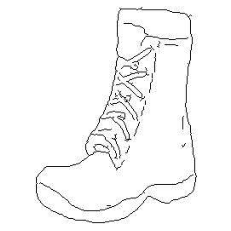

In [4]:
src_image = load_image('train_s/'+img)
pyplot.imshow(src_image[0])
pyplot.axis('off')

# Testing Validation Set

In [5]:
from tqdm import tqdm
from os import listdir
from os.path import join, isfile
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot

In [6]:
#g_model = load_model('Shoes_Checkpoints/model_aug_shoes_0034000.h5')
#g_model = load_model('Shoes_Checkpoints/model_ck_0036000.h5')
g_model = load_model('Shoes_Checkpoints/model_ck_0051000.h5')


In [7]:
path = 'img37092_AB.jpg.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


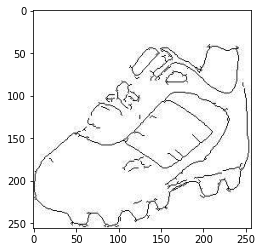

In [8]:
src_image = load_image('train_s/'+path)
pyplot.imshow(src_image[0])

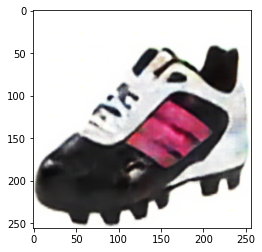

In [9]:
gen_image = g_model.predict(src_image)
gen_image = (gen_image + 1) / 2.0
pyplot.imshow(gen_image[0])

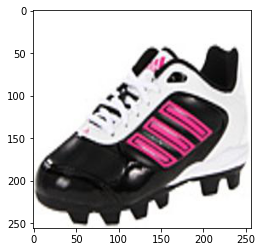

In [10]:
real_image = load_image('train_i/'+path)
real_image = (real_image + 1) / 2.0
pyplot.imshow(real_image[0])

In [11]:
def test_images(path, size=(256,512)):
    i = 0
    for filename in tqdm(listdir(path)):
        # Print every 10 iter
        if i >= 1110:
            break     
        img = load_image(path+filename)
        print(img.shape)
        pred = g_model.predict(img)
        pred = (pred + 1) / 2.0
        pyplot.imsave('Validation_results/'+filename +'.jpg', pred[0])
        i += 1
    print('i: {}'.format(i))
    #return [np.asarray(src_list), np.asarray(tar_list)]

In [12]:
test_images('val_train_s/')

  0%|▍                                                                                 | 2/400 [00:00<00:30, 12.93it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  1%|▊                                                                                 | 4/400 [00:00<00:30, 13.15it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  2%|█▋                                                                                | 8/400 [00:00<00:31, 12.60it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  2%|██                                                                               | 10/400 [00:00<00:32, 11.98it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  3%|██▍                                                                              | 12/400 [00:00<00:33, 11.61it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


  4%|███▏                                                                             | 16/400 [00:01<00:39,  9.74it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


  4%|███▋                                                                             | 18/400 [00:01<00:35, 10.65it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  5%|████                                                                             | 20/400 [00:01<00:32, 11.70it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  6%|████▊                                                                            | 24/400 [00:02<00:30, 12.21it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  6%|█████▎                                                                           | 26/400 [00:02<00:30, 12.45it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  8%|██████                                                                           | 30/400 [00:02<00:29, 12.42it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  8%|██████▍                                                                          | 32/400 [00:02<00:29, 12.41it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


  9%|███████▎                                                                         | 36/400 [00:03<00:29, 12.27it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 10%|███████▋                                                                         | 38/400 [00:03<00:30, 11.75it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 10%|████████▌                                                                        | 42/400 [00:03<00:31, 11.45it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 11%|████████▉                                                                        | 44/400 [00:03<00:29, 12.07it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 12%|█████████▎                                                                       | 46/400 [00:03<00:29, 12.03it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 12%|██████████▏                                                                      | 50/400 [00:04<00:29, 11.71it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 13%|██████████▌                                                                      | 52/400 [00:04<00:30, 11.34it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 14%|███████████▎                                                                     | 56/400 [00:04<00:31, 10.84it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 14%|███████████▋                                                                     | 58/400 [00:04<00:28, 11.81it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 15%|████████████▏                                                                    | 60/400 [00:05<00:30, 11.14it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 16%|████████████▌                                                                    | 62/400 [00:05<00:30, 11.08it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 16%|█████████████▎                                                                   | 66/400 [00:05<00:30, 11.07it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 17%|█████████████▊                                                                   | 68/400 [00:05<00:30, 10.76it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 18%|██████████████▏                                                                  | 70/400 [00:06<00:29, 11.06it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 18%|██████████████▌                                                                  | 72/400 [00:06<00:32, 10.22it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 19%|███████████████▍                                                                 | 76/400 [00:06<00:27, 11.79it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 20%|███████████████▊                                                                 | 78/400 [00:06<00:26, 12.16it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 20%|████████████████▌                                                                | 82/400 [00:07<00:27, 11.44it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 21%|█████████████████                                                                | 84/400 [00:07<00:27, 11.70it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 22%|█████████████████▍                                                               | 86/400 [00:07<00:27, 11.27it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 22%|██████████████████▏                                                              | 90/400 [00:07<00:26, 11.86it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 23%|██████████████████▋                                                              | 92/400 [00:07<00:24, 12.33it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 24%|███████████████████▍                                                             | 96/400 [00:08<00:28, 10.62it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 24%|███████████████████▊                                                             | 98/400 [00:08<00:28, 10.68it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 26%|████████████████████▍                                                           | 102/400 [00:08<00:25, 11.53it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 26%|████████████████████▊                                                           | 104/400 [00:09<00:24, 11.96it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 27%|█████████████████████▌                                                          | 108/400 [00:09<00:25, 11.51it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 28%|██████████████████████                                                          | 110/400 [00:09<00:23, 12.29it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 28%|██████████████████████▊                                                         | 114/400 [00:09<00:24, 11.86it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 29%|███████████████████████▏                                                        | 116/400 [00:10<00:25, 11.05it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 30%|████████████████████████                                                        | 120/400 [00:10<00:24, 11.65it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 30%|████████████████████████▍                                                       | 122/400 [00:10<00:23, 12.05it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 32%|█████████████████████████▏                                                      | 126/400 [00:10<00:23, 11.57it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 32%|█████████████████████████▌                                                      | 128/400 [00:11<00:24, 11.20it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 32%|██████████████████████████                                                      | 130/400 [00:11<00:23, 11.54it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 33%|██████████████████████████▍                                                     | 132/400 [00:11<00:22, 11.80it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 34%|███████████████████████████▏                                                    | 136/400 [00:11<00:22, 11.92it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 34%|███████████████████████████▌                                                    | 138/400 [00:11<00:21, 12.46it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 36%|████████████████████████████▍                                                   | 142/400 [00:12<00:19, 13.32it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 36%|█████████████████████████████▏                                                  | 146/400 [00:12<00:17, 14.15it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 37%|█████████████████████████████▌                                                  | 148/400 [00:12<00:18, 13.89it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 38%|██████████████████████████████                                                  | 150/400 [00:12<00:18, 13.87it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 38%|██████████████████████████████▊                                                 | 154/400 [00:13<00:18, 13.15it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 39%|███████████████████████████████▏                                                | 156/400 [00:13<00:17, 13.58it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 40%|████████████████████████████████                                                | 160/400 [00:13<00:18, 13.27it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 40%|████████████████████████████████▍                                               | 162/400 [00:13<00:18, 12.99it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 42%|█████████████████████████████████▏                                              | 166/400 [00:13<00:17, 13.23it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 42%|█████████████████████████████████▌                                              | 168/400 [00:14<00:17, 12.91it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 43%|██████████████████████████████████▍                                             | 172/400 [00:14<00:16, 13.75it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 44%|███████████████████████████████████▏                                            | 176/400 [00:14<00:16, 13.77it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 44%|███████████████████████████████████▌                                            | 178/400 [00:14<00:15, 13.90it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 45%|████████████████████████████████████                                            | 180/400 [00:15<00:16, 13.50it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 46%|████████████████████████████████████▊                                           | 184/400 [00:15<00:16, 12.84it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 46%|█████████████████████████████████████▏                                          | 186/400 [00:15<00:16, 13.31it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 48%|██████████████████████████████████████                                          | 190/400 [00:15<00:15, 13.81it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 48%|██████████████████████████████████████▊                                         | 194/400 [00:16<00:14, 14.14it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 49%|███████████████████████████████████████▏                                        | 196/400 [00:16<00:14, 14.34it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 50%|███████████████████████████████████████▌                                        | 198/400 [00:16<00:14, 13.93it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 50%|████████████████████████████████████████▍                                       | 202/400 [00:16<00:14, 14.10it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 51%|████████████████████████████████████████▊                                       | 204/400 [00:16<00:14, 13.11it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 52%|█████████████████████████████████████████▌                                      | 208/400 [00:17<00:15, 12.30it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 52%|██████████████████████████████████████████                                      | 210/400 [00:17<00:15, 11.93it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 54%|██████████████████████████████████████████▊                                     | 214/400 [00:17<00:15, 12.37it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 54%|███████████████████████████████████████████▏                                    | 216/400 [00:17<00:14, 12.61it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 55%|████████████████████████████████████████████                                    | 220/400 [00:18<00:14, 12.40it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 56%|████████████████████████████████████████████▍                                   | 222/400 [00:18<00:14, 11.88it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 56%|█████████████████████████████████████████████▏                                  | 226/400 [00:18<00:13, 13.09it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 57%|█████████████████████████████████████████████▌                                  | 228/400 [00:18<00:12, 13.34it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 58%|██████████████████████████████████████████████▍                                 | 232/400 [00:19<00:13, 12.24it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 58%|██████████████████████████████████████████████▊                                 | 234/400 [00:19<00:12, 13.16it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 60%|███████████████████████████████████████████████▌                                | 238/400 [00:19<00:12, 13.22it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 60%|████████████████████████████████████████████████                                | 240/400 [00:19<00:12, 13.25it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 61%|████████████████████████████████████████████████▊                               | 244/400 [00:19<00:12, 12.53it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 62%|█████████████████████████████████████████████████▏                              | 246/400 [00:20<00:12, 12.78it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 62%|██████████████████████████████████████████████████                              | 250/400 [00:20<00:12, 12.50it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 63%|██████████████████████████████████████████████████▍                             | 252/400 [00:20<00:11, 12.51it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 64%|██████████████████████████████████████████████████▊                             | 254/400 [00:20<00:11, 13.06it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 64%|███████████████████████████████████████████████████▌                            | 258/400 [00:21<00:13, 10.71it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 65%|████████████████████████████████████████████████████                            | 260/400 [00:21<00:12, 11.09it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 66%|████████████████████████████████████████████████████▊                           | 264/400 [00:21<00:11, 12.03it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 66%|█████████████████████████████████████████████████████▏                          | 266/400 [00:21<00:10, 12.44it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 68%|██████████████████████████████████████████████████████                          | 270/400 [00:22<00:10, 12.78it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 68%|██████████████████████████████████████████████████████▍                         | 272/400 [00:22<00:09, 13.09it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 69%|███████████████████████████████████████████████████████▏                        | 276/400 [00:22<00:09, 13.16it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 70%|███████████████████████████████████████████████████████▌                        | 278/400 [00:22<00:09, 12.91it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 70%|████████████████████████████████████████████████████████▍                       | 282/400 [00:23<00:08, 13.20it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 71%|████████████████████████████████████████████████████████▊                       | 284/400 [00:23<00:08, 13.02it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 72%|█████████████████████████████████████████████████████████▌                      | 288/400 [00:23<00:08, 13.44it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 72%|██████████████████████████████████████████████████████████                      | 290/400 [00:23<00:08, 13.62it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 74%|██████████████████████████████████████████████████████████▊                     | 294/400 [00:23<00:07, 13.50it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 74%|███████████████████████████████████████████████████████████▏                    | 296/400 [00:24<00:07, 13.80it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 75%|████████████████████████████████████████████████████████████                    | 300/400 [00:24<00:07, 13.34it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 76%|████████████████████████████████████████████████████████████▍                   | 302/400 [00:24<00:07, 12.85it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 76%|█████████████████████████████████████████████████████████████▏                  | 306/400 [00:24<00:07, 13.23it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 77%|█████████████████████████████████████████████████████████████▌                  | 308/400 [00:25<00:06, 13.32it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 78%|██████████████████████████████████████████████████████████████▍                 | 312/400 [00:25<00:06, 13.08it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 78%|██████████████████████████████████████████████████████████████▊                 | 314/400 [00:25<00:06, 12.96it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 80%|███████████████████████████████████████████████████████████████▌                | 318/400 [00:25<00:06, 12.96it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 80%|████████████████████████████████████████████████████████████████                | 320/400 [00:25<00:06, 13.13it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 81%|████████████████████████████████████████████████████████████████▊               | 324/400 [00:26<00:05, 13.79it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 82%|█████████████████████████████████████████████████████████████████▏              | 326/400 [00:26<00:05, 13.81it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 82%|██████████████████████████████████████████████████████████████████              | 330/400 [00:26<00:05, 12.99it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 83%|██████████████████████████████████████████████████████████████████▍             | 332/400 [00:26<00:05, 12.12it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 84%|███████████████████████████████████████████████████████████████████▏            | 336/400 [00:27<00:04, 12.84it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 84%|███████████████████████████████████████████████████████████████████▌            | 338/400 [00:27<00:05, 10.55it/s]

(1, 256, 256, 3)


 85%|████████████████████████████████████████████████████████████████████            | 340/400 [00:27<00:05, 11.13it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 86%|████████████████████████████████████████████████████████████████████▍           | 342/400 [00:27<00:05, 11.32it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 86%|█████████████████████████████████████████████████████████████████████▏          | 346/400 [00:28<00:04, 12.29it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 87%|█████████████████████████████████████████████████████████████████████▌          | 348/400 [00:28<00:04, 12.41it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 88%|██████████████████████████████████████████████████████████████████████▍         | 352/400 [00:28<00:03, 12.48it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 88%|██████████████████████████████████████████████████████████████████████▊         | 354/400 [00:28<00:03, 11.72it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 90%|███████████████████████████████████████████████████████████████████████▌        | 358/400 [00:29<00:03, 10.86it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 90%|████████████████████████████████████████████████████████████████████████        | 360/400 [00:29<00:03, 11.59it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 90%|████████████████████████████████████████████████████████████████████████▍       | 362/400 [00:29<00:03, 11.37it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 91%|████████████████████████████████████████████████████████████████████████▊       | 364/400 [00:29<00:03, 11.65it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 92%|█████████████████████████████████████████████████████████████████████████▏      | 366/400 [00:29<00:03, 10.90it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 92%|██████████████████████████████████████████████████████████████████████████      | 370/400 [00:30<00:02, 11.06it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 93%|██████████████████████████████████████████████████████████████████████████▍     | 372/400 [00:30<00:02, 10.99it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 94%|███████████████████████████████████████████████████████████████████████████▏    | 376/400 [00:30<00:02, 11.72it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 94%|███████████████████████████████████████████████████████████████████████████▌    | 378/400 [00:30<00:02, 10.36it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 95%|████████████████████████████████████████████████████████████████████████████    | 380/400 [00:31<00:01, 10.99it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 96%|████████████████████████████████████████████████████████████████████████████▍   | 382/400 [00:31<00:01, 11.43it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 386/400 [00:31<00:01, 10.92it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 388/400 [00:31<00:01, 11.51it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 98%|██████████████████████████████████████████████████████████████████████████████  | 390/400 [00:31<00:00, 11.13it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 394/400 [00:32<00:00, 11.61it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


 99%|███████████████████████████████████████████████████████████████████████████████▏| 396/400 [00:32<00:00, 12.03it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:32<00:00, 11.41it/s]

(1, 256, 256, 3)
(1, 256, 256, 3)


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:32<00:00, 12.18it/s]

i: 400


# Frechet Inception Distance 

In [13]:
def load_image(path, size = (256,256)):
    imgs_list = []
    i = 0
    for filename in tqdm(listdir(path)):
        if i >= 201:
            break
        img = image.load_img(path + filename, target_size=size)       
        #pyplot.imshow(img)
        #pyplot.axis('off')
        img = image.img_to_array(img)
        img = (img + 1) / 2.0
        imgs_list.append(img)
        i += 1
    return imgs_list

In [14]:
images1 = load_image('Validation_results/')
images2 = load_image('val_train_i/')

 50%|███████████████████████████████████████▋                                       | 201/400 [00:00<00:00, 486.45it/s]


In [15]:
images1 = np.asarray(images1)
images2 = np.asarray(images2)

In [16]:
print(type(images1))
print(type(images2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


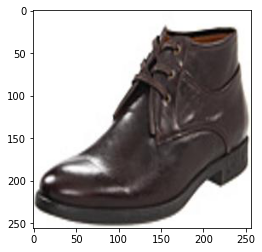

In [17]:
i=0
for img in images2:
    if i >= 10:
        break
    pyplot.imshow(array_to_img(img))
    i+=1

In [18]:
# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
    # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
    # store
        images_list.append(new_image)
    return asarray(images_list)

In [19]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

In [20]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# define two fake collections of images
#images1 = randint(0, 255, 10*32*32*3)
#images1 = images1.reshape((10,32,32,3))
#images2 = randint(0, 255, 10*32*32*3)
#images2 = images2.reshape((10,32,32,3))
print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# fid between images1 and images1
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)


Prepared (201, 256, 256, 3) (201, 256, 256, 3)
Scaled (201, 299, 299, 3) (201, 299, 299, 3)
FID (same): -0.000
FID (different): 122.776
